In [1]:
import json, glob, os
import pandas as pd
import numpy as np

In [2]:
results = glob.glob('results/clean-expert*results.json')
len(results)

8

In [3]:
fname = results[0]
res = json.load(open(fname))

In [13]:
res

{'32': [[True]],
 '33': [[True]],
 '34': [[-2]],
 '35': [[-2]],
 '36': [[False]],
 '37': [[True]],
 '38': [[-1]],
 '39': [[True]],
 '40': [[False]],
 '41': [[True]],
 '42': [[True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,


In [3]:
task = json.load(open('test.json'))

In [4]:
import itertools

In [12]:
probs = [task[k] for k in range(0, len(task), 2)]
len(probs)

64

In [42]:
a = list(itertools.product(['-2=>', '-1=>', 'False=>', 'True=>'], ['-2', '-1', 'False', 'True']))
#a = ['problem index'] + [''.join(b) for b in a]
a = [''.join(b) for b in a]

In [57]:
better = pd.DataFrame(0, index=probs, columns=a)
same = pd.DataFrame(0, index=probs, columns=a)
worse = pd.DataFrame(0, index=probs, columns=a)
prob_idx = pd.Series(dtype=np.int32)
for fname in results:
    res = json.load(open(fname))
    for k, v in itertools.filterfalse(lambda x: int(x[0])%2, res.items()):
        k = int(k)
        if len(v[0]) == 0:
            print(f'{task[k]} had no test cases')
            continue
        theirs = res[str(k+1)]
        ours, theirs = v[0], theirs[0]
        
        assert len(ours) == len(theirs), 'len must be the same'
        num = task[k]
        prob_idx[num] = k
        for our, their in zip(ours, theirs):
            col = f'{their}=>{our}'
            if our > their:
                better.loc[num, col] += 1
            elif our < their:
                worse.loc[num, col] += 1
            else:
                same.loc[num, col] += 1

interview/1693 had no test cases
interview/1732 had no test cases
interview/1742 had no test cases
interview/1799 had no test cases


In [58]:
better

,-2=>-2,-2=>-1,-2=>False,-2=>True,-1=>-2,-1=>-1,-1=>False,-1=>True,False=>-2,False=>-1,False=>False,False=>True,True=>-2,True=>-1,True=>False,True=>True
interview/0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
interview/0015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
interview/0048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
interview/0050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
interview/0051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
introductory/2607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
introductory/2618,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
introductory/3433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
introductory/3940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
A = better.loc[:, ~(better==0).all()]
A = A.loc[~(A==0).all(axis=1)]
A['prob index'] = prob_idx
idx = A.pop('prob index')
A.insert(0, 'prob index', idx)
A

,prob index,-1=>False
competition/2021,64,18


In [60]:
B = same.loc[:, ~(same==0).all()]
B = B.loc[~(B==0).all(axis=1)]
B['prob index'] = prob_idx
idx = B.pop('prob index')
B.insert(0, 'prob index', idx)
B

,prob index,-2=>-2,-1=>-1,False=>False,True=>True
interview/0015,2,0,0,0,1
interview/0051,8,0,0,0,1
interview/0123,18,0,0,0,1
interview/0160,20,0,0,0,1
interview/0203,22,1,0,0,0
interview/0205,24,1,0,0,0
interview/0342,28,1,0,0,0
interview/0351,30,0,0,0,1
interview/0358,32,0,0,0,1
interview/0367,34,1,0,0,0


In [61]:
C = worse.loc[:, ~(worse==0).all()]
C = C.loc[~(C==0).all(axis=1)]
C['prob index'] = prob_idx
C

,False=>-1,True=>-1,True=>False,prob index
interview/0000,1,0,0,0
interview/0048,0,0,1,4
interview/0050,0,0,1,6
interview/0053,0,0,1,10
interview/0083,0,0,1,12
interview/0098,0,0,1,14
interview/0118,0,0,1,16
interview/0335,0,1,0,26
interview/0443,0,0,1,36
interview/1218,0,1,0,38


In [62]:
idx = C.pop('prob index')
C.insert(0, 'prob index', idx)
C

,prob index,False=>-1,True=>-1,True=>False
interview/0000,0,1,0,0
interview/0048,4,0,0,1
interview/0050,6,0,0,1
interview/0053,10,0,0,1
interview/0083,12,0,0,1
interview/0098,14,0,0,1
interview/0118,16,0,0,1
interview/0335,26,0,1,0
interview/0443,36,0,0,1
interview/1218,38,0,1,0


In [64]:
A.to_csv('better.csv', index_label='problem num'), B.to_csv('same.csv', index_label='problem num'), C.to_csv('worse.csv', index_label='problem num')

(None, None, None)

In [103]:
A.sum(), B.sum(), C.sum()

(-1=>False    18
 dtype: int64, -2=>-2            6
 -1=>-1            1
 False=>False      9
 True=>True      113
 dtype: int64, False=>-1       8
 True=>-1       24
 True=>False    38
 dtype: int64)

In [104]:
A.sum().sum(), B.sum().sum(), C.sum().sum()

(18, 129, 70)

In [87]:
ours = pd.DataFrame(0, columns=[-2, -1, False, True], index=['introductory', 'interview', 'competition'])
theirs = pd.DataFrame(0, columns=[-2, -1, False, True], index=['introductory', 'interview', 'competition'])
for fname in results:
    res = json.load(open(fname))
    for k, v in res.items():
        k = int(k)
        if len(v[0]) == 0:
            print(f'{task[k]} had no test cases')
            continue
        arr = np.asarray(v[0])
        idx, count = np.unique(arr, return_counts=True)
        if k%2 == 0:
            difficulty = task[k]
            diff = os.path.split(difficulty)[0]
            for i in range(len(idx)):
                ours.loc[diff, idx[i]] += count[i]
        else:
            difficulty = task[k-1]
            diff = os.path.split(difficulty)[0]
            for i in range(len(idx)):
                theirs.loc[diff, idx[i]] += count[i]

interview/1693 had no test cases
train/1693 had no test cases
interview/1732 had no test cases
train/1732 had no test cases
interview/1742 had no test cases
train/1742 had no test cases
interview/1799 had no test cases
train/1799 had no test cases


In [88]:
exp_ours = ours.copy()
exp_ours

,-2,-1,False,True
introductory,2,2,12,20
interview,4,1,11,98
competition,0,8,42,17


In [89]:
exp_theirs = theirs.copy()
exp_theirs

,-2,-1,False,True
introductory,2,0,4,30
interview,4,0,1,109
competition,1,19,12,32


In [90]:
exp_ours.div(exp_ours.sum(axis=1), axis=0)

,-2,-1,False,True
introductory,0.055556,0.055556,0.333333,0.555556
interview,0.035088,0.008772,0.096491,0.859649
competition,0.000000,0.119403,0.626866,0.253731


In [91]:
exp_theirs.div(exp_theirs.sum(axis=1), axis=0)

,-2,-1,False,True
introductory,0.055556,0.000000,0.111111,0.833333
interview,0.035088,0.000000,0.008772,0.956140
competition,0.015625,0.296875,0.187500,0.500000


In [92]:
exp_ours.sum()

-2         6
-1        11
False     65
True     135
dtype: int64

In [93]:
exp_theirs.sum()

-2         7
-1        19
False     17
True     171
dtype: int64

In [94]:
exp_ours.sum(axis=1)

introductory     36
interview       114
competition      67
dtype: int64

In [95]:
exp_theirs.sum(axis=1)

introductory     36
interview       114
competition      64
dtype: int64

In [96]:
results = glob.glob('results/clean-summary*results.json')
len(results)

8

In [97]:
ours = pd.DataFrame(0, columns=[-2, -1, False, True], index=['introductory', 'interview', 'competition'])
theirs = pd.DataFrame(0, columns=[-2, -1, False, True], index=['introductory', 'interview', 'competition'])
for fname in results:
    res = json.load(open(fname))
    for k, v in res.items():
        k = int(k)
        if len(v[0]) == 0:
            print(f'{task[k]} had no test cases')
            continue
        arr = np.asarray(v[0])
        idx, count = np.unique(arr, return_counts=True)
        if k%2 == 0:
            difficulty = task[k]
            diff = os.path.split(difficulty)[0]
            for i in range(len(idx)):
                ours.loc[diff, idx[i]] += count[i]
        else:
            difficulty = task[k-1]
            diff = os.path.split(difficulty)[0]
            for i in range(len(idx)):
                theirs.loc[diff, idx[i]] += count[i]

interview/1693 had no test cases
train/1693 had no test cases
interview/1732 had no test cases
train/1732 had no test cases
interview/1742 had no test cases
train/1742 had no test cases
interview/1799 had no test cases
train/1799 had no test cases


In [98]:
sum_ours = ours.copy()
sum_ours

,-2,-1,False,True
introductory,2,2,12,20
interview,4,1,11,98
competition,0,8,42,17


In [99]:
sum_theirs = theirs.copy()
sum_theirs

,-2,-1,False,True
introductory,2,0,4,30
interview,4,0,1,109
competition,1,19,12,32


In [82]:
sum_ours.div(sum_ours.sum(axis=1), axis=0)

,-2,-1,False,True
introductory,0.055556,0.055556,0.333333,0.555556
interview,0.035088,0.008772,0.096491,0.859649
competition,0.000000,0.119403,0.626866,0.253731


In [83]:
sum_theirs.div(sum_theirs.sum(axis=1), axis=0)

,-2,-1,False,True
introductory,0.055556,0.000000,0.111111,0.833333
interview,0.035088,0.000000,0.008772,0.956140
competition,0.015625,0.296875,0.187500,0.500000


In [85]:
sum_ours.sum()

-2         6
-1        11
False     65
True     135
dtype: int64

In [86]:
sum_theirs.sum()

-2         7
-1        19
False     17
True     171
dtype: int64

In [103]:
index = pd.MultiIndex.from_product([['introductory', 'interview', 'competitive'], [-2, -1, False, True]])
index

MultiIndex(levels=[['competitive', 'interview', 'introductory'], [-2, -1, False, True]],
           codes=[[2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [221]:
import itertools

In [224]:
index = list(itertools.product(['introductory', 'interview', 'competitive'], [-2, -1, False, True]))
index

[('introductory', -2),
 ('introductory', -1),
 ('introductory', False),
 ('introductory', True),
 ('interview', -2),
 ('interview', -1),
 ('interview', False),
 ('interview', True),
 ('competitive', -2),
 ('competitive', -1),
 ('competitive', False),
 ('competitive', True)]

In [225]:
df2 = pd.DataFrame(0, index=index, columns=['original', 'summary', 'expert'])
df2

,original,summary,expert
"(introductory, -2)",0,0,0
"(introductory, -1)",0,0,0
"(introductory, False)",0,0,0
"(introductory, True)",0,0,0
"(interview, -2)",0,0,0
"(interview, -1)",0,0,0
"(interview, False)",0,0,0
"(interview, True)",0,0,0
"(competitive, -2)",0,0,0
"(competitive, -1)",0,0,0


In [128]:
df = pd.DataFrame(0, index=index, columns=['original', 'summary', 'expert'])
df

original  summary  expert
introductory -2            0        0       0
             -1            0        0       0
             False         0        0       0
             True          0        0       0
interview    -2            0        0       0
             -1            0        0       0
             False         0        0       0
             True          0        0       0
competitive  -2            0        0       0
             -1            0        0       0
             False         0        0       0
             True          0        0       0

In [126]:
df.loc['introductory', 'original'] = theirs.loc['introductory']

In [123]:
theirs.loc['introductory']

-2        2
-1        0
False     4
True     30
Name: introductory, dtype: int64

In [146]:
df['original'] = theirs.values.reshape(-1,1)
df['summary'] = sum_ours.values.reshape(-1,1)
df['expert'] = exp_ours.values.reshape(-1,1)

In [147]:
df

original  summary  expert
introductory -2            2        2       2
             -1            0        2       2
             False         4       12      12
             True         30       20      20
interview    -2            4        4       4
             -1            0        1       1
             False         1       11      11
             True        109       98      98
competitive  -2            1        0       0
             -1           19        8       8
             False        12       42      42
             True         32       17      17

In [218]:
test = df.unstack()
test

original                summary               expert           \
                   -2  -1 False True      -2 -1 False True     -2 -1 False   
competitive         1  19    12   32       0  8    42   17      0  8    42   
interview           4   0     1  109       4  1    11   98      4  1    11   
introductory        2   0     4   30       2  2    12   20      2  2    12   

                   
             True  
competitive    17  
interview      98  
introductory   20

In [176]:
test = df.unstack(level=0)
test

original                            summary                         \
      competitive interview introductory competitive interview introductory   
-2              1         4            2           0         4            2   
-1             19         0            0           8         1            2   
False          12         1            4          42        11           12   
True           32       109           30          17        98           20   

           expert                         
      competitive interview introductory  
-2              0         4            2  
-1              8         1            2  
False          42        11           12  
True           17        98           20

In [219]:
test.unstack(level=1)

original  -2     competitive       1
                 interview         4
                 introductory      2
          -1     competitive      19
                 interview         0
                 introductory      0
          False  competitive      12
                 interview         1
                 introductory      4
          True   competitive      32
                 interview       109
                 introductory     30
summary   -2     competitive       0
                 interview         4
                 introductory      2
          -1     competitive       8
                 interview         1
                 introductory      2
          False  competitive      42
                 interview        11
                 introductory     12
          True   competitive      17
                 interview        98
                 introductory     20
expert    -2     competitive       0
                 interview         4
                 introductory      2
 

In [206]:
ravioli = test.loc[True]
ravioli

original  competitive      32
          interview       109
          introductory     30
summary   competitive      17
          interview        98
          introductory     20
expert    competitive      17
          interview        98
          introductory     20
Name: True, dtype: int64

In [212]:
ravioli.unstack(level=1)

,competitive,interview,introductory
original,32,109,30
summary,17,98,20
expert,17,98,20


In [149]:
import matplotlib.pyplot as plt

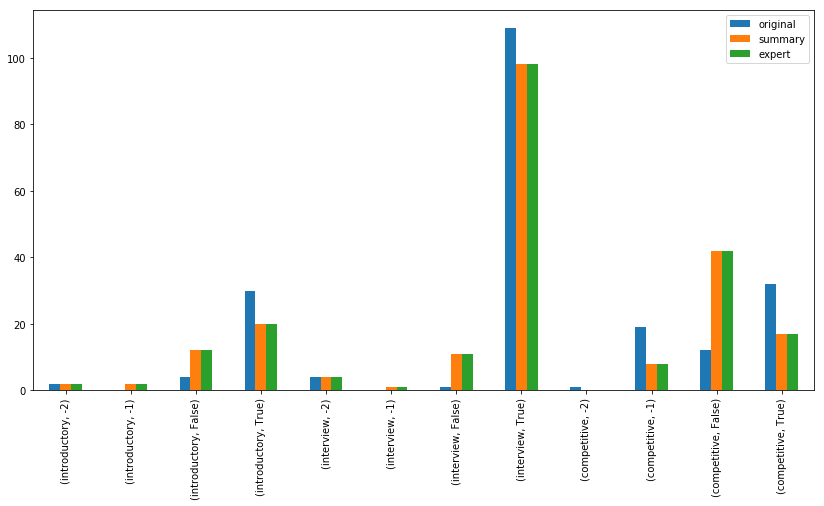

In [241]:
df.plot(kind='bar', figsize=(14, 7))
plt.show()

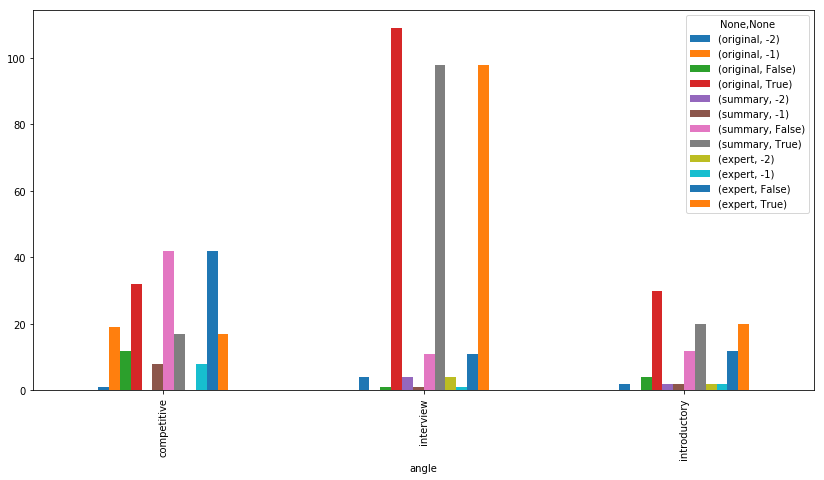

In [239]:
ax = test.plot(kind='bar', figsize=(14,7), xticks=[-2, -1, False, True])
# plt.xticks("hello_x")
# plt.yticks("hello_y")
ax.set_xlabel("angle")
plt.show()

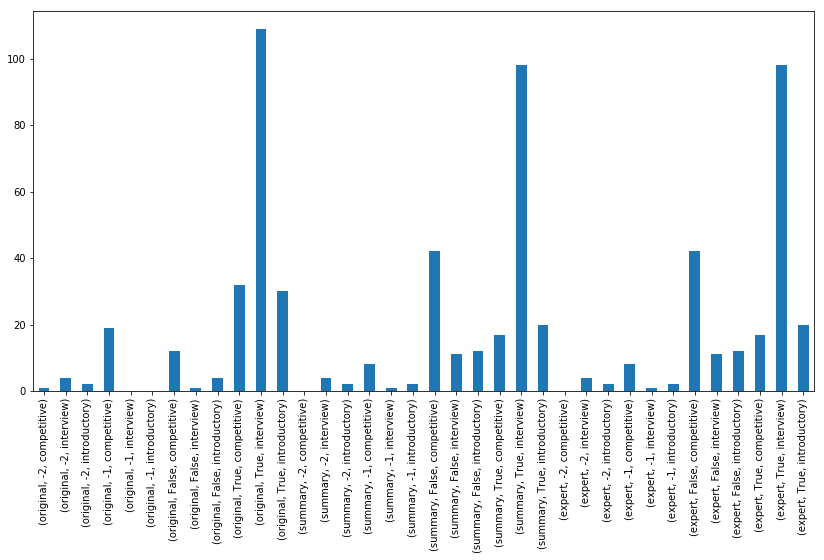

In [220]:
test.unstack(level=1).plot(kind='bar', figsize=(14,7), xticks=[-2, -1, False, True])
plt.show()

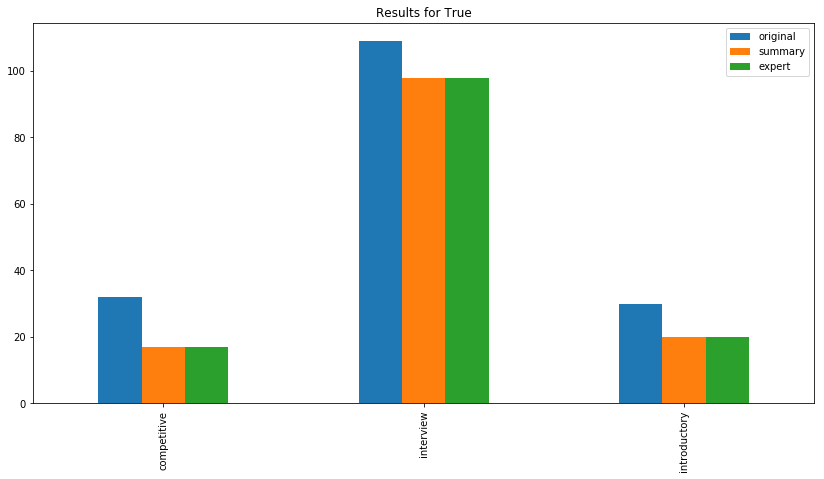

In [214]:
ravioli.unstack(level=0).plot(kind='bar', figsize=(14,7), title='Results for True')
plt.show()